In [4]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt,joblib
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,average_precision_score
from sklearn.metrics import adjusted_mutual_info_score,balanced_accuracy_score,roc_curve,auc

In [5]:
#Import Data
df=pd.read_csv('database_IND.csv')

In [6]:
#Check head
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [44]:
df.shape

(908, 25)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 908 entries, 862 to 753
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url     

In [45]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [8]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

Find the columns with missing Data

In [9]:
nacolumns=df.columns[df.isnull().any()]

In [10]:
nacolumns=list(nacolumns)

In [11]:
df.drop(nacolumns,axis=1)

,country,country_long,name,gppd_idnr,capacity_mw,primary_fuel,source,url
0,IND,India,ACME Solar Tower,WRI1020239,2.5,Solar,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,Coal,Ultratech Cement ltd,http://www.ultratechcement.com/
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,Wind,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...
3,IND,India,AGARTALA GT,IND0000001,135.0,Gas,Central Electricity Authority,http://www.cea.nic.in/
4,IND,India,AKALTARA TPP,IND0000002,1800.0,Coal,Central Electricity Authority,http://www.cea.nic.in/
...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,Coal,Central Electricity Authority,http://www.cea.nic.in/
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,Solar,Karnataka Power Corporation Limited,http://karnatakapower.com
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,Wind,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...
906,IND,India,ZAWAR MINES,WRI1019901,80.0,Coal,Hindustan Zinc ltd,http://www.hzlindia.com/


In [60]:
df = df.sample(frac=1, random_state = 0)

Find the columns with missing Data

In [13]:
gclean_df=df.drop(nacolumns,axis=1)

Exploratory Analysis and Visualization

Looking deeply into the rows and columns

In [14]:
print(len(gclean_df),"Rows")
print(len(gclean_df.columns),"columns")
print(gclean_df.shape, "of Shape")
print(gclean_df.ndim, "Dimension")

908 Rows
8 columns
(908, 8) of Shape
2 Dimension


In [16]:
#What is the number of countries on the data set
gclean_df.country.nunique()

1

In [17]:
groupedcountry=gclean_df.groupby(by='country_long',as_index=False)

In [18]:
countrycapa=groupedcountry[['capacity_mw']].agg(sum)

In [19]:
countrycapa.sort_values('capacity_mw',inplace=True)

Lets Check the top 3 producers

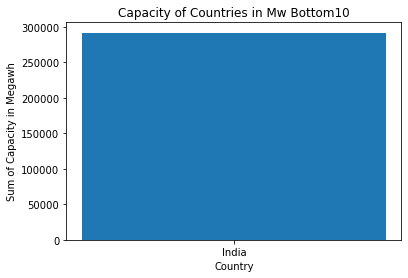

In [20]:
plt.bar(countrycapa['country_long'].head(3), countrycapa['capacity_mw'].head(3) ) 
  
plt.xlabel("Country") 
plt.ylabel("Sum of Capacity in Megawh") 
plt.title("Capacity of Countries in Mw Bottom10") 
plt.show() 

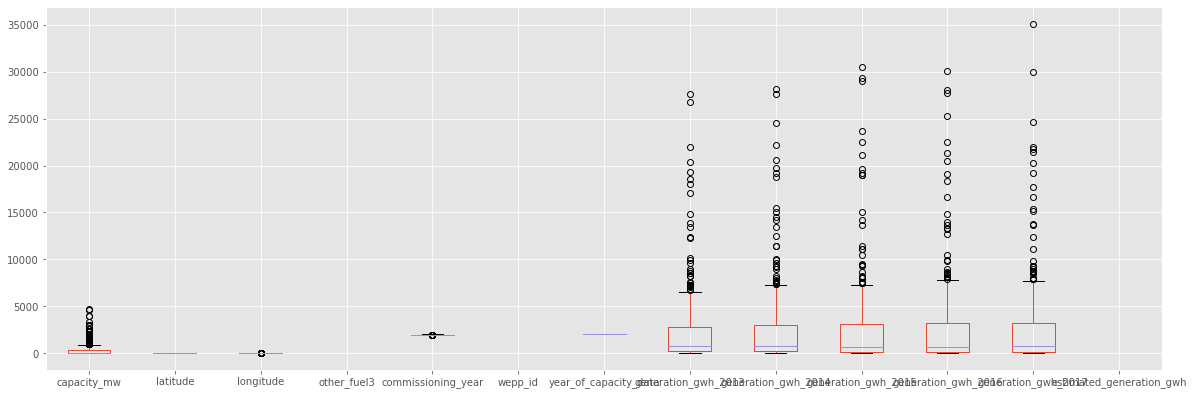

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

countries producing Highest electricity are shown above

In [21]:
groupedfuel=gclean_df.groupby(by='primary_fuel',as_index=False)

In [22]:
fuelnum=groupedfuel.size()

What are the total number of plants in each type of Primary Fuel

In [23]:
fuelnum.sort_values(['size'],ascending=False,inplace=True)
print(fuelnum)

  primary_fuel  size
1         Coal   259
3        Hydro   250
6        Solar   127
7         Wind   123
2          Gas    69
0      Biomass    50
5          Oil    21
4      Nuclear     9


I have country level data on emissions so i am merging it with my dataset on a left join

In [24]:
groupedcountrylong=gclean_df.groupby(by='country_long',as_index=False)
countrylongcapa=groupedcountrylong[['capacity_mw']].agg(sum)
print(countrylongcapa)

  country_long  capacity_mw
0        India   291510.111


In [25]:
countrylongcapa

,country_long,capacity_mw
0,India,291510.111


In [27]:
gclean_df['country_long']=gclean_df['country_long'].apply(lambda x: x.upper())

In [28]:
countrylongcapa['country_long']=countrylongcapa['country_long'].apply(lambda x: x.upper())


Histograms

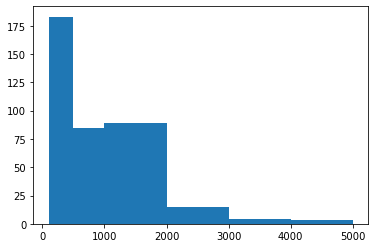

In [34]:
plt.hist(gclean_df.capacity_mw,bins=[100,500,1000,2000,3000,4000,5000])
plt.show()

NameError: name 'df_merge' is not defined

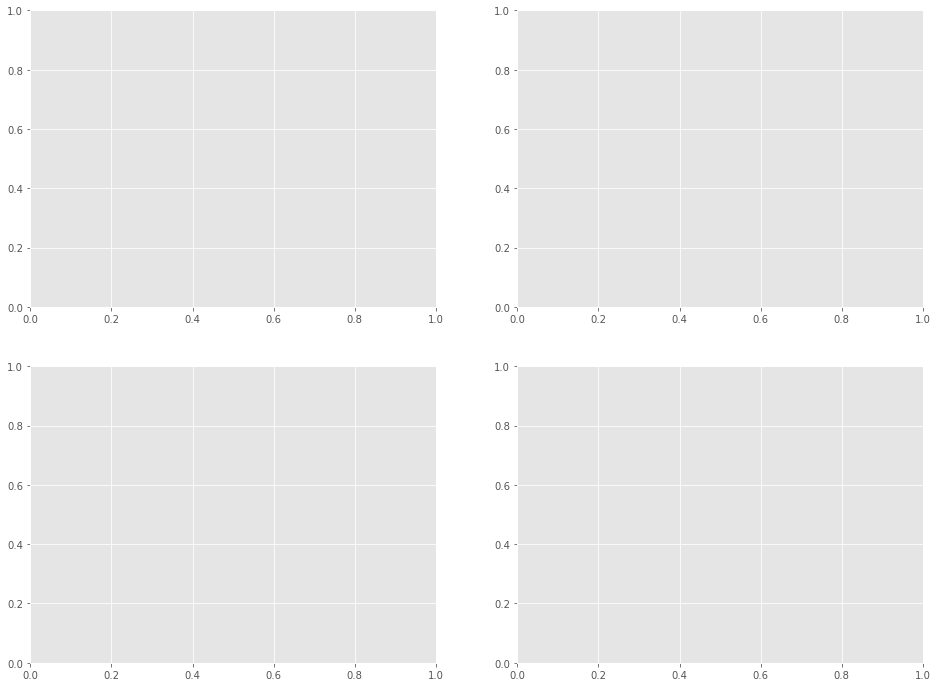

In [38]:
plt.style.use('ggplot')
 
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Use the axes for plotting
axes[0,0].hist(df_merge['SO2 Emissions (Mg)'],color='r')
axes[0,0].set_xlabel('SO2 Emission')
axes[0,0].set_ylabel('Number of Countries')
axes[0,0].set_title('SO2 Emissions (Mg) in the World')

axes[0,1].hist(df_merge['NOx Emissions (Mg)'],color='g')
axes[0,1].set_xlabel('NOx Emission')
axes[0,1].set_ylabel('Number of Countries')
axes[0,1].set_title('NOx Emissions (Mg) in the World')

axes[1,0].hist(df_merge['PM2.5 Emissions (Mg)'],color='y',bins=[50000,100000,200000,300000,400000])
axes[1,0].set_xlabel('PM2.5 Emission')
axes[1,0].set_ylabel('Number of Countries')
axes[1,0].set_title('PM2.5 Emissions (Mg) in the World')

axes[1,1].hist(df_merge['CO2 Emissions (Mg)'],color='b')
axes[1,1].set_xlabel('CO2 Emissions')
axes[1,1].set_ylabel('Number of Countries')
axes[1,1].set_title('CO2 Emissions (Mg) in the World')

plt.show()

df_merge['binned']=pd.cut(df_merge['capacity_mw'],bins=4,labels=['low','medium','high',"very high"])
df_merge['binned'].value_counts()
df_merge[df_merge['binned']=='very high']
plt.style.use('ggplot')
 
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Use the axes for plotting
axes[0,0].scatter(df_merge['capacity_mw'],df_merge['SO2 Emissions (Mg)'],color='r')
axes[0,0].set_ylabel('SO2 Emission')
axes[0,0].set_xlabel('Capacity MwH')
axes[0,0].set_title('SO2 Emissions (Mg) in the World vs Capacity in MwH')

axes[0,1].scatter(df_merge['capacity_mw'],df_merge['NOx Emissions (Mg)'],color='g')
axes[0,1].set_ylabel('NOx Emission')
axes[0,1].set_xlabel('Capacity MwH')
axes[0,1].set_title('NOx Emissions (Mg) in the World vs Capacity in MwH')

axes[1,0].scatter(df_merge['capacity_mw'],df_merge['PM2.5 Emissions (Mg)'],color='y')
axes[1,0].set_ylabel('PM2.5 Emission')
axes[1,0].set_xlabel('Capacity MwH')
axes[1,0].set_title('PM2.5 Emissions (Mg) in the World vs Capacity in MwH')


axes[1,1].scatter(df_merge['capacity_mw'],df_merge['CO2 Emissions (Mg)'],color='b')
axes[1,1].set_ylabel('CO2 Emissions')
axes[1,1].set_xlabel('Capacity MwH')
axes[1,1].set_title('CO2 Emissions (Mg) in the World vs Capacity in MwH')

plt.show()

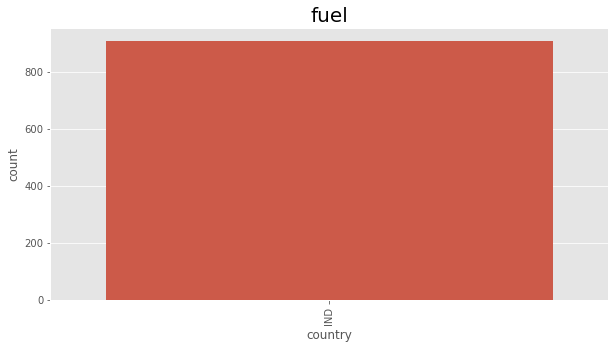

In [52]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x="country", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("fuel", fontsize = 20)
plt.show()

In [56]:
x = df.drop("country", axis=1)
y = df["country"]       

In [57]:
x.skew()

capacity_mw                 3.193257
latitude                   -0.143622
longitude                   1.100942
other_fuel3                      NaN
commissioning_year         -1.056132
wepp_id                          NaN
year_of_capacity_data       0.000000
generation_gwh_2013         3.416338
generation_gwh_2014         3.357683
generation_gwh_2015         3.679016
generation_gwh_2016         3.524785
generation_gwh_2017         3.576849
estimated_generation_gwh         NaN
dtype: float64

In [58]:
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer() 
for i in int_list:
    if abs(x.loc[:,i].skew())>0.55:
        x.loc[:,i]=PT.fit_transform(x.loc[:,i].values.reshape(-1,1))

NameError: name 'int_list' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,auc
import warnings
warnings.filterwarnings('ignore')
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu," on Random_state ",maxRS)

In [78]:
X=df.drop('primary_fuel',axis=1)
y=df['capacity_mw']

In [79]:
def model(mod):
    maxscore=0
    maxstate=0
    for x in range(42,102):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=x)
        model=mod
        model.fit(X_train,y_train)
        predict=model.predict(X_test)
        fpr,tpr,thresholds=roc_curve(y_test,predict)
        ac=auc(fpr,tpr)
        acc=accuracy_score(y_test,predict)
        if acc>maxscore:
            maxscore=acc
            maxstate=x
    print('Max score is {} and Max state is {}'.format(maxscore,maxstate))

In [ ]:
model(LogisticRegression(max_iter=20))

In [ ]:
joblib.dump(sv,'database_IND.csv')